In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

sns.set_style("white")
sns.set_context("talk")
sns.color_palette("colorblind")

diagrams_basic = np.array([[[0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.70710677, 0.        ],
        [0.        , 0.        , 1.        ],
        [0.70710677, 1.        , 2.        ]]])

1
1


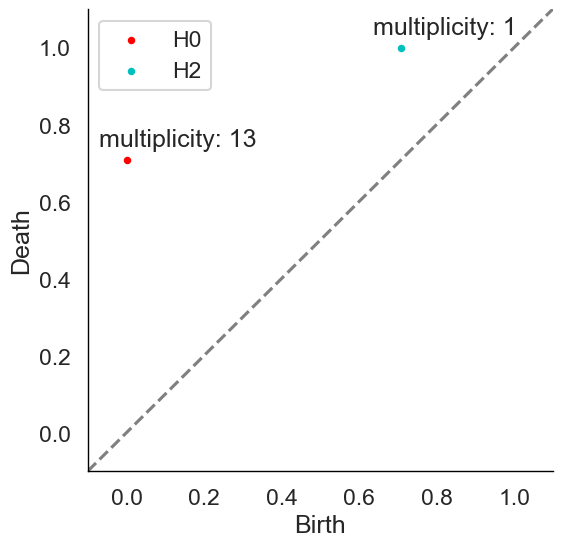

In [41]:
import numpy as np
diagram = diagrams_basic[0]

homology_dimensions = np.unique(diagram[:,2])

birth_death_pairs = diagram[diagram[:, 0] != diagram[:, 1]]

no_homology_pairs = birth_death_pairs[:,:2]

posinfinite_mask = np.isposinf(no_homology_pairs)
neginfinite_mask = np.isneginf(no_homology_pairs)
    
max_val = np.max(np.where(posinfinite_mask, -np.inf, no_homology_pairs))
min_val = np.min(np.where(neginfinite_mask, np.inf, no_homology_pairs))

extra_space = 0.1 * (max_val - min_val)
min_val_display = min_val - extra_space
max_val_display = max_val + extra_space

dotted_line = [[min_val_display, max_val_display], [min_val_display, max_val_display]]

fig, ax = plt.subplots()

fig.set_size_inches(6, 6)

ax.plot(dotted_line[0], dotted_line[1], linestyle='--', color='grey')

for dim in homology_dimensions:
    subdiagram = birth_death_pairs[birth_death_pairs[:,2] == dim]
    unique, counts = np.unique(subdiagram, axis=0, return_counts=True)
    
    if unique.shape[0] == 0:
        continue
    
    x = unique[:,0]
    y = unique[:,1]
    
    print(len(counts))
    
    col = ['r' if int(x) == 0 else 'b' if int(x) == 1 else 'c' for x in unique[:,2]]
    ax.scatter(x, y, label = f"H{int(dim)}", c = col, s = 15)
    
    for i in range(len(counts)):
        annotation = f"multiplicity: {counts[i]}"
        ax.annotate(annotation, xy=(x[i], y[i]), xytext=(-20, 10), textcoords='offset points')

ax.set_xlabel("Birth")
ax.set_ylabel("Death")
ax.set_xlim(min_val_display, max_val_display)
ax.set_ylim(min_val_display, max_val_display)

ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(0.2))


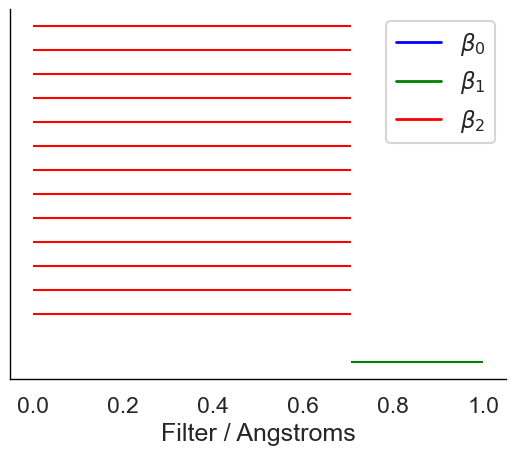

In [23]:
x_left = diagrams_basic[0][:, 0].tolist()
x_right = diagrams_basic[0][:, 1].tolist()
height = np.arange(0, -diagrams_basic.shape[1], -1).tolist()
col = ['r' if int(x) == 0 else 'b' if int(x) == 1 else 'g' for x in diagrams_basic[0][:, 2]]

fig, ax = plt.subplots()
ax.hlines(y=height, xmin=x_left, xmax=x_right, linewidth=1.5, color=col)

# Add legend
legend_labels = [r'$\beta_0$', r'$\beta_1$', r'$\beta_2$']
legend_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in set(col)]
ax.legend(legend_handles, legend_labels)

ax.set_xlabel("Filter / Angstroms")
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks([])
plt.show()